# Notebook 1b: Gradebook Data Wrangling
## Calbright Data Analysis Program (2025 Q1)

## Description
This notebook processes gradebook data to calculate student competency completion progress for the peer tutoring effectiveness analysis.

**Input:** Raw gradebook exports from BUS500 and BUS501 courses  
**Process:** Data cleaning, merging, progress calculation, and student segmentation  
**Output:** Clean datasets showing completion progress for tutored vs untutored students

---
## 1 Data Wrangling

### 1.1 Setup and Imports

In [4]:
#Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Load Data: GradeBook

In [6]:
# the supplied CSV data file is the "raw_data" directory
gb_data_500 = pd.read_csv('../raw_data/BUS500_2025-04-07 12_10 PM PT.csv') 
gb_data_501 = pd.read_csv('../raw_data/BUS501_2025-04-07 12_19 PM PT.csv') 

In [7]:
#Call the info method on the data to see a summary of the data
gb_data_500.info() 
gb_data_501.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2659 entries, 0 to 2658
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Learner Last Name                       2659 non-null   object
 1   Learner First Name                      2656 non-null   object
 2   Learner Identifier                      2659 non-null   object
 3   DATA ANALYSIS: Terminology              2659 non-null   object
 4   DATA ANALYSIS: Spreadsheets             2659 non-null   object
 5   DATA ANALYSIS: Basic SQL Queries        2659 non-null   object
 6   DATA ANALYSIS: Presentation Skills      2659 non-null   object
 7   DATA ANALYSIS: Research                 2659 non-null   object
 8   DATA ANALYSIS: Data Validity            2659 non-null   object
 9   DATA ANALYSIS: Mathematical Principles  2659 non-null   object
 10  Introduction to Data Analysis Program   2659 non-null   object
dtypes: o

In [8]:
# check the size of original dataset
gb_data_500.shape, gb_data_501.shape

((2659, 11), (521, 9))

### 1.3 Data Cleaning and Validation

#### 1.3.1 Check for Null Values

In [11]:
# Total number of null values in the whole DataFrame
total_nulls = gb_data_500.isnull().sum().sum()
print(f"Total number of null entries: {total_nulls}")

# Number of nulls per column
nulls_per_column = gb_data_500.isnull().sum()
print("Null entries per column:")
print(nulls_per_column)

Total number of null entries: 3
Null entries per column:
Learner Last Name                         0
Learner First Name                        3
Learner Identifier                        0
DATA ANALYSIS: Terminology                0
DATA ANALYSIS: Spreadsheets               0
DATA ANALYSIS: Basic SQL Queries          0
DATA ANALYSIS: Presentation Skills        0
DATA ANALYSIS: Research                   0
DATA ANALYSIS: Data Validity              0
DATA ANALYSIS: Mathematical Principles    0
Introduction to Data Analysis Program     0
dtype: int64


In [12]:
# Total number of null values in the whole DataFrame
total_nulls = gb_data_501.isnull().sum().sum()
print(f"Total number of null entries: {total_nulls}")

# Number of nulls per column
nulls_per_column = gb_data_501.isnull().sum()
print("Null entries per column:")
print(nulls_per_column)

Total number of null entries: 1
Null entries per column:
Learner Last Name                          0
Learner First Name                         1
Learner Identifier                         0
DATA ANALYSIS: Intermediate SQL Queries    0
DATA ANALYSIS: Data Ethics                 0
DATA ANALYSIS: Data Presentation Skills    0
DATA ANALYSIS: Professional Learning       0
DATA ANALYSIS: Durable Skills              0
Introduction to Data Analysis Program      0
dtype: int64


#### 1.3.2 Check for Duplicates

In [14]:
# Check for duplicate rows
duplicate_rows = gb_data_500[gb_data_500.duplicated()]

# Print number of duplicates
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Optionally, display the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Learner Last Name, Learner First Name, Learner Identifier, DATA ANALYSIS: Terminology, DATA ANALYSIS: Spreadsheets, DATA ANALYSIS: Basic SQL Queries, DATA ANALYSIS: Presentation Skills, DATA ANALYSIS: Research, DATA ANALYSIS: Data Validity, DATA ANALYSIS: Mathematical Principles, Introduction to Data Analysis Program]
Index: []


In [15]:
# Check for duplicate rows
duplicate_rows = gb_data_501[gb_data_501.duplicated()]

# Print number of duplicates
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Optionally, display the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Learner Last Name, Learner First Name, Learner Identifier, DATA ANALYSIS: Intermediate SQL Queries, DATA ANALYSIS: Data Ethics, DATA ANALYSIS: Data Presentation Skills, DATA ANALYSIS: Professional Learning, DATA ANALYSIS: Durable Skills, Introduction to Data Analysis Program]
Index: []


In [16]:
# Check duplicates based on a specific column (e.g., 'Learner Identifier')
duplicates_by_LID = gb_data_500[gb_data_500.duplicated(subset='Learner Identifier')]
print(duplicates_by_LID)

Empty DataFrame
Columns: [Learner Last Name, Learner First Name, Learner Identifier, DATA ANALYSIS: Terminology, DATA ANALYSIS: Spreadsheets, DATA ANALYSIS: Basic SQL Queries, DATA ANALYSIS: Presentation Skills, DATA ANALYSIS: Research, DATA ANALYSIS: Data Validity, DATA ANALYSIS: Mathematical Principles, Introduction to Data Analysis Program]
Index: []


In [17]:
# Check duplicates based on a specific column (e.g., 'Learner Identifier')
duplicates_by_LID = gb_data_501[gb_data_501.duplicated(subset='Learner Identifier')]
print(duplicates_by_LID)

Empty DataFrame
Columns: [Learner Last Name, Learner First Name, Learner Identifier, DATA ANALYSIS: Intermediate SQL Queries, DATA ANALYSIS: Data Ethics, DATA ANALYSIS: Data Presentation Skills, DATA ANALYSIS: Professional Learning, DATA ANALYSIS: Durable Skills, Introduction to Data Analysis Program]
Index: []


In [ ]:
#Call the head method on the data to print the first several rows of the data
gb_data_500.head()

In [ ]:
#Call the head method on the data to print the first several rows of the data
gb_data_501.head()

#### 1.3.3 Check Student Overlap Between Courses: BUS500 and BUS501

In [21]:
# To check whether all students in gb_data_501 are also present in gb_data_500, based on the "Learner Identifier" column
# Check if all Learner Identifiers in 501 exist in 500
all_in_500 = gb_data_501["Learner Identifier"].isin(gb_data_500["Learner Identifier"])

# Are all True?
all_present = all_in_500.all()

print("All learners in 501 are in 500:", all_present)

All learners in 501 are in 500: False


In [ ]:
# Check which students are not in 500
missing_learners = gb_data_501[~all_in_500]
print("Learners in 501 not in 500:")
print(missing_learners)

**Note**: `Four` students in BUS501 but not BUS500 are assumed to have completed BUS500 previously. These nulls are filled as 'Complete' in Section **1.4.3 Handle Missing Values**.

**Caution**: Students who completed the program previously are still included in the dataset, showing 0% progress in the "Introduction to Data Analysis Program" column for both the 500 and 501 datasets.

#### 1.3.4 Identify Previously Graduated Students

**Note**: Previously Graduated Students are included in the gradebook and should have 0% "Introduction to Data Analysis Program" in Both BUS500 and BUS501 (Incomplete for all 12 Competencies).

In [27]:
# Assuming 0% in the "Introduction to Data Analysis Program" column = "Incomplete" in all competency columns for 500 and 501.
# Extract and compare students with 0% in the "Introduction to Data Analysis Program" column from both datasets:

# Filter students with 0% in "Introduction to Data Analysis Program" from gb_data_500
zero_500 = gb_data_500[gb_data_500["Introduction to Data Analysis Program"] == "0%"]

# Filter students with 0% in "Introduction to Data Analysis Program" from gb_data_501
zero_501 = gb_data_501[gb_data_501["Introduction to Data Analysis Program"] == "0%"]

# Inner join on "Learner Identifier" to find students with 0% in both datasets
zero_both = pd.merge(
    zero_500, 
    zero_501, 
    on="Learner Identifier", 
    suffixes=("_500", "_501")
)

# Optionally show shapes to confirm
print("Zero in 500:", zero_500.shape)
print("Zero in 501:", zero_501.shape)
print("Zero in both (inner join):", zero_both.shape)

Zero in 500: (1275, 11)
Zero in 501: (106, 9)
Zero in both (inner join): (105, 19)


In [28]:
# check gb_data_500
# Filter rows with "0%" in the final column
zero_rows_500 = gb_data_500[gb_data_500["Introduction to Data Analysis Program"] == "0%"]

# Get assessment columns (between Learner Identifier and Intro column)
start_500 = gb_data_500.columns.get_loc("Learner Identifier") + 1
end_500 = gb_data_500.columns.get_loc("Introduction to Data Analysis Program")
assessment_cols_500 = gb_data_500.columns[start_500:end_500]

# Check for 'all Incomplete' condition
all_incomplete_500 = (zero_rows_500[assessment_cols_500] == "Incomplete").all(axis=1)

# Count how many met the condition
count_incomplete_500 = all_incomplete_500.sum()
print(f"gb_data_500 - Rows with 0% and all 'Incomplete': {count_incomplete_500}")

# Store rows that did NOT meet the condition
exceptions_500 = zero_rows_500[~all_incomplete_500]
print("gb_data_500 - Rows with 0% but NOT all 'Incomplete':")
print(exceptions_500)

gb_data_500 - Rows with 0% and all 'Incomplete': 1275
gb_data_500 - Rows with 0% but NOT all 'Incomplete':
Empty DataFrame
Columns: [Learner Last Name, Learner First Name, Learner Identifier, DATA ANALYSIS: Terminology, DATA ANALYSIS: Spreadsheets, DATA ANALYSIS: Basic SQL Queries, DATA ANALYSIS: Presentation Skills, DATA ANALYSIS: Research, DATA ANALYSIS: Data Validity, DATA ANALYSIS: Mathematical Principles, Introduction to Data Analysis Program]
Index: []


In [29]:
# check gb_data_501
# Filter rows with "0%" in the final column
zero_rows_501 = gb_data_501[gb_data_501["Introduction to Data Analysis Program"] == "0%"]

# Get assessment columns
start_501 = gb_data_501.columns.get_loc("Learner Identifier") + 1
end_501 = gb_data_501.columns.get_loc("Introduction to Data Analysis Program")
assessment_cols_501 = gb_data_501.columns[start_501:end_501]

# Check for 'all Incomplete' condition
all_incomplete_501 = (zero_rows_501[assessment_cols_501] == "Incomplete").all(axis=1)

# Count how many met the condition
count_incomplete_501 = all_incomplete_501.sum()
print(f"gb_data_501 - Rows with 0% and all 'Incomplete': {count_incomplete_501}")

# Store rows that did NOT meet the condition
exceptions_501 = zero_rows_501[~all_incomplete_501]
print("gb_data_501 - Rows with 0% but NOT all 'Incomplete':")
print(exceptions_501)

gb_data_501 - Rows with 0% and all 'Incomplete': 106
gb_data_501 - Rows with 0% but NOT all 'Incomplete':
Empty DataFrame
Columns: [Learner Last Name, Learner First Name, Learner Identifier, DATA ANALYSIS: Intermediate SQL Queries, DATA ANALYSIS: Data Ethics, DATA ANALYSIS: Data Presentation Skills, DATA ANALYSIS: Professional Learning, DATA ANALYSIS: Durable Skills, Introduction to Data Analysis Program]
Index: []


**Note**: These `105` graduated students will be removed later in Section **2.2.2.3 Remove Graduated Students and Final Visualization**

### 1.4 Data Transformation

#### 1.4.1 Prepare Gradebook Data (Date Filtering)

##### 1.4.1.1 BUS500 Data Preparation

##### Cutoff date: 1/1/2025

gb_data_500: need to prepare the grade book for 1/1/2025 by replacing any “Complete on …” entry with “Incomplete” if the completion date is **after** January 1, 2025.

In [36]:
# Always copy to avoid modifying original data
df = gb_data_500.copy()

In [ ]:
# Define the cutoff date
cutoff_date = pd.to_datetime("2025-01-01")

# Identify columns with assessment data (excluding name/id columns)
assessment_columns = df.columns[3:-1]  # all except first 3 and last column

# Function to update completion status based on date
def update_completion_status(value):
    if isinstance(value, str) and value.startswith("Complete on"):
        try:
            date_str = value.split("Complete on ")[1]
            completion_date = pd.to_datetime(date_str)
            return value if completion_date <= cutoff_date else "Incomplete"
        except Exception:
            return value
    return value

# Apply the transformation across relevant columns
df[assessment_columns] = df[assessment_columns].applymap(update_completion_status)

# Show the updated rows
df[assessment_columns].head()

In [ ]:
# Save transformed version safely
gb_data_500_20250101 = df.copy()
gb_data_500_20250101.head()

##### Cutoff date: 3/31/2025

gb_data_500: need to prepare the grade book for 3/31/2025 by replacing any “Complete on …” entry with “Incomplete” if the completion date is **after** March 31, 2025.

In [41]:
# Always copy to avoid modifying original data
df = gb_data_500.copy()

In [42]:
# Define the cutoff date
cutoff_date = pd.to_datetime("2025-03-31")

# Identify columns with assessment data (excluding name/id columns)
assessment_columns = df.columns[3:-1]  # all except first 3 and last column

# Function to update completion status based on date
def update_completion_status(value):
    if isinstance(value, str) and value.startswith("Complete on"):
        try:
            date_str = value.split("Complete on ")[1]
            completion_date = pd.to_datetime(date_str)
            return value if completion_date <= cutoff_date else "Incomplete"
        except Exception:
            return value
    return value

# Apply the transformation across relevant columns
df[assessment_columns] = df[assessment_columns].applymap(update_completion_status)

# Show the updated rows
df[assessment_columns].head()

,DATA ANALYSIS: Terminology,DATA ANALYSIS: Spreadsheets,DATA ANALYSIS: Basic SQL Queries,DATA ANALYSIS: Presentation Skills,DATA ANALYSIS: Research,DATA ANALYSIS: Data Validity,DATA ANALYSIS: Mathematical Principles
0,Incomplete,Incomplete,Incomplete,Incomplete,Incomplete,Incomplete,Incomplete
1,Complete on 2024-08-10T15:43:03.169,Complete on 2024-08-11T22:54:32.014,Incomplete,Incomplete,Incomplete,Incomplete,Incomplete
2,Complete on 2024-09-02T12:37:20.540,Complete on 2024-10-02T21:05:47.423,Complete on 2024-12-12T19:39:04.199,Complete on 2024-12-21T12:54:03.313,Complete on 2025-02-13T11:20:26.987,Complete on 2025-03-16T10:56:53.575,Complete on 2025-03-18T19:45:36.223
3,Complete on 2024-07-27T13:06:18.921,Complete on 2024-08-07T21:35:59.760,Complete on 2024-07-28T14:04:51.595,Complete on 2024-08-07T22:27:31.467,Complete on 2024-08-25T00:06:59.396,Complete on 2024-08-25T00:15:04.042,Complete on 2024-08-25T00:27:45.474
4,Incomplete,Incomplete,Incomplete,Incomplete,Incomplete,Incomplete,Incomplete


In [ ]:
# Save transformed version safely
gb_data_500_20250331 = df.copy()
gb_data_500_20250331.head()

##### 1.4.1.2 BUS501 Data Preparation

##### Cutoff date: 1/1/2025

gb_data_501: need to prepare the grade book for 1/1/2025 by replacing any “Complete on …” entry with “Incomplete” if the completion date is **after** January 1, 2025.

In [47]:
# Always copy to avoid modifying original data
df = gb_data_501.copy()

In [48]:
# Define the cutoff date
cutoff_date = pd.to_datetime("2025-01-01")

# Identify columns with assessment data (excluding name/id columns)
assessment_columns = df.columns[3:-1]  # all except first 3 and last column

# Function to update completion status based on date
def update_completion_status(value):
    if isinstance(value, str) and value.startswith("Complete on"):
        try:
            date_str = value.split("Complete on ")[1]
            completion_date = pd.to_datetime(date_str)
            return value if completion_date <= cutoff_date else "Incomplete"
        except Exception:
            return value
    return value

# Apply the transformation across relevant columns
df[assessment_columns] = df[assessment_columns].applymap(update_completion_status)

# Show the updated rows
df[assessment_columns].head()

,DATA ANALYSIS: Intermediate SQL Queries,DATA ANALYSIS: Data Ethics,DATA ANALYSIS: Data Presentation Skills,DATA ANALYSIS: Professional Learning,DATA ANALYSIS: Durable Skills
0,Incomplete,Incomplete,Incomplete,Incomplete,Incomplete
1,Complete on 2024-09-18T08:44:26.195,Complete on 2024-09-18T10:46:37.043,Incomplete,Complete on 2024-09-17T22:58:14.796,Complete on 2024-09-18T11:08:19.710
2,Incomplete,Incomplete,Incomplete,Incomplete,Incomplete
3,Incomplete,Incomplete,Incomplete,Incomplete,Incomplete
4,Incomplete,Incomplete,Incomplete,Incomplete,Incomplete


In [ ]:
# Save transformed version safely
gb_data_501_20250101 = df.copy()
gb_data_501_20250101.head()

##### Cutoff date: 3/31/2025

gb_data_501: need to prepare the grade book for 3/31/2025 by replacing any “Complete on …” entry with “Incomplete” if the completion date is **after** March 31, 2025

In [52]:
# Always copy to avoid modifying original data
df = gb_data_501.copy()

In [53]:
# Define the cutoff date
cutoff_date = pd.to_datetime("2025-03-31")

# Identify columns with assessment data (excluding name/id columns)
assessment_columns = df.columns[3:-1]  # all except first 3 and last column

# Function to update completion status based on date
def update_completion_status(value):
    if isinstance(value, str) and value.startswith("Complete on"):
        try:
            date_str = value.split("Complete on ")[1]
            completion_date = pd.to_datetime(date_str)
            return value if completion_date <= cutoff_date else "Incomplete"
        except Exception:
            return value
    return value

# Apply the transformation across relevant columns
df[assessment_columns] = df[assessment_columns].applymap(update_completion_status)

# Show the updated rows
df[assessment_columns].head()

,DATA ANALYSIS: Intermediate SQL Queries,DATA ANALYSIS: Data Ethics,DATA ANALYSIS: Data Presentation Skills,DATA ANALYSIS: Professional Learning,DATA ANALYSIS: Durable Skills
0,Incomplete,Incomplete,Incomplete,Incomplete,Incomplete
1,Complete on 2024-09-18T08:44:26.195,Complete on 2024-09-18T10:46:37.043,Incomplete,Complete on 2024-09-17T22:58:14.796,Complete on 2024-09-18T11:08:19.710
2,Incomplete,Incomplete,Incomplete,Incomplete,Incomplete
3,Complete on 2025-01-13T17:36:54.539,Incomplete,Incomplete,Incomplete,Incomplete
4,Incomplete,Incomplete,Incomplete,Incomplete,Incomplete


In [ ]:
# Save transformed version safely
gb_data_501_20250331 = df.copy()
gb_data_501_20250331.head()

#### 1.4.2 Combine BUS500 and BUS501 Data

##### 1.4.2.1 BUS500 Column Selection

In [57]:
# Always copy to avoid modifying original data
df = gb_data_500_20250101.copy()

In [ ]:
# Identify columns with assessment data (excluding name/Introduction to Data Analysis Program columns)
neccessary_columns = df.columns[2:-1]
df[neccessary_columns].head()

In [ ]:
# Save transformed version safely
gb_data_500_20250101c = df[neccessary_columns].copy()
gb_data_500_20250101c.head()

In [60]:
# Always copy to avoid modifying original data
df = gb_data_500_20250331.copy()

In [ ]:
# Identify columns with assessment data (excluding name/Introduction to Data Analysis Program columns)
neccessary_columns = df.columns[2:-1]
df[neccessary_columns].head()

In [ ]:
# Save transformed version safely
gb_data_500_20250331c = df[neccessary_columns].copy()
gb_data_500_20250331c.head()

##### 1.4.2.2 BUS501 Column Selection

In [64]:
# Always copy to avoid modifying original data
df = gb_data_501_20250101.copy()

In [ ]:
# Identify columns with assessment data (excluding name/id columns)
neccessary_columns = df.columns[2:-1]
df[neccessary_columns].head()

In [ ]:
# Save transformed version safely
gb_data_501_20250101c = df[neccessary_columns].copy()
gb_data_501_20250101c.head()

In [67]:
# Always copy to avoid modifying original data
df = gb_data_501_20250331.copy()

In [ ]:
# Identify columns with assessment data (excluding name/id columns)
neccessary_columns = df.columns[2:-1]
df[neccessary_columns].head()

In [ ]:
# Save transformed version safely
gb_data_501_20250331c = df[neccessary_columns].copy()
gb_data_501_20250331c.head()

##### 1.4.2.3 Merge Datasets: BUS500 and BUS501

In [ ]:
# Perform outer join on the 'Learner Identifier' column
gb_data_500_501_20250101 = pd.merge(gb_data_500_20250101c, gb_data_501_20250101c, on='Learner Identifier', how='outer')
gb_data_500_501_20250101.head()

In [ ]:
# Perform outer join on the 'Learner Identifier' column
gb_data_500_501_20250331 = pd.merge(gb_data_500_20250331c, gb_data_501_20250331c, on='Learner Identifier', how='outer')
gb_data_500_501_20250331.head()

In [73]:
#Call the info method on the data to see a summary of the data
gb_data_500_501_20250101.info() 
gb_data_500_501_20250331.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2663 entries, 0 to 2662
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Learner Identifier                       2663 non-null   object
 1   DATA ANALYSIS: Terminology               2659 non-null   object
 2   DATA ANALYSIS: Spreadsheets              2659 non-null   object
 3   DATA ANALYSIS: Basic SQL Queries         2659 non-null   object
 4   DATA ANALYSIS: Presentation Skills       2659 non-null   object
 5   DATA ANALYSIS: Research                  2659 non-null   object
 6   DATA ANALYSIS: Data Validity             2659 non-null   object
 7   DATA ANALYSIS: Mathematical Principles   2659 non-null   object
 8   DATA ANALYSIS: Intermediate SQL Queries  521 non-null    object
 9   DATA ANALYSIS: Data Ethics               521 non-null    object
 10  DATA ANALYSIS: Data Presentation Skills  521 non-null    obj

In [74]:
# Total number of null values in the whole DataFrame
total_nulls = gb_data_500_501_20250101.isnull().sum().sum()
print(f"Total number of null entries: {total_nulls}")

# Number of nulls per column
nulls_per_column = gb_data_500_501_20250101.isnull().sum()
print("Null entries per column:")
print(nulls_per_column)

Total number of null entries: 10738
Null entries per column:
Learner Identifier                            0
DATA ANALYSIS: Terminology                    4
DATA ANALYSIS: Spreadsheets                   4
DATA ANALYSIS: Basic SQL Queries              4
DATA ANALYSIS: Presentation Skills            4
DATA ANALYSIS: Research                       4
DATA ANALYSIS: Data Validity                  4
DATA ANALYSIS: Mathematical Principles        4
DATA ANALYSIS: Intermediate SQL Queries    2142
DATA ANALYSIS: Data Ethics                 2142
DATA ANALYSIS: Data Presentation Skills    2142
DATA ANALYSIS: Professional Learning       2142
DATA ANALYSIS: Durable Skills              2142
dtype: int64


In [75]:
# Total number of null values in the whole DataFrame
total_nulls = gb_data_500_20250101c.isnull().sum().sum()
print(f"Total number of null entries: {total_nulls}")

# Number of nulls per column
nulls_per_column = gb_data_500_20250101c.isnull().sum()
print("Null entries per column:")
print(nulls_per_column)

Total number of null entries: 0
Null entries per column:
Learner Identifier                        0
DATA ANALYSIS: Terminology                0
DATA ANALYSIS: Spreadsheets               0
DATA ANALYSIS: Basic SQL Queries          0
DATA ANALYSIS: Presentation Skills        0
DATA ANALYSIS: Research                   0
DATA ANALYSIS: Data Validity              0
DATA ANALYSIS: Mathematical Principles    0
dtype: int64


In [76]:
# Total number of null values in the whole DataFrame
total_nulls = gb_data_501_20250101c.isnull().sum().sum()
print(f"Total number of null entries: {total_nulls}")

# Number of nulls per column
nulls_per_column = gb_data_501_20250101c.isnull().sum()
print("Null entries per column:")
print(nulls_per_column)

Total number of null entries: 0
Null entries per column:
Learner Identifier                         0
DATA ANALYSIS: Intermediate SQL Queries    0
DATA ANALYSIS: Data Ethics                 0
DATA ANALYSIS: Data Presentation Skills    0
DATA ANALYSIS: Professional Learning       0
DATA ANALYSIS: Durable Skills              0
dtype: int64


In [77]:
# Total number of null values in the whole DataFrame
total_nulls = gb_data_500_501_20250331.isnull().sum().sum()
print(f"Total number of null entries: {total_nulls}")

# Number of nulls per column
nulls_per_column = gb_data_500_501_20250331.isnull().sum()
print("Null entries per column:")
print(nulls_per_column)

Total number of null entries: 10738
Null entries per column:
Learner Identifier                            0
DATA ANALYSIS: Terminology                    4
DATA ANALYSIS: Spreadsheets                   4
DATA ANALYSIS: Basic SQL Queries              4
DATA ANALYSIS: Presentation Skills            4
DATA ANALYSIS: Research                       4
DATA ANALYSIS: Data Validity                  4
DATA ANALYSIS: Mathematical Principles        4
DATA ANALYSIS: Intermediate SQL Queries    2142
DATA ANALYSIS: Data Ethics                 2142
DATA ANALYSIS: Data Presentation Skills    2142
DATA ANALYSIS: Professional Learning       2142
DATA ANALYSIS: Durable Skills              2142
dtype: int64


**Note**: The null values in the merged BUS500 and BUS501 datasets are the result of the outer join.

#### 1.4.3 Handle Missing Values

**Assumption**: Students with null values in BUS500 have completed BUS500. Students with null values in BUS501 have not completed BUS501.

**Filling Null Values**: BUS500 nulls → 'Complete' (`4` students), BUS501 nulls → 'Incomplete' (`2142` students)

In [82]:
# Always copy to avoid modifying original data
df = gb_data_500_501_20250101.copy()

In [83]:
# Should fill 4 null values in the Bus500 Competencies with "complete"
# Columns to fill with "complete"
fill_complete_cols = [
    "DATA ANALYSIS: Terminology",
    "DATA ANALYSIS: Spreadsheets",
    "DATA ANALYSIS: Basic SQL Queries",
    "DATA ANALYSIS: Presentation Skills",
    "DATA ANALYSIS: Research",
    "DATA ANALYSIS: Data Validity",
    "DATA ANALYSIS: Mathematical Principles"
]

# Should fill 2142 null values in the Bus501 Competencies with "incomplete"
# Columns to fill with "incomplete"
fill_incomplete_cols = [
    "DATA ANALYSIS: Intermediate SQL Queries",
    "DATA ANALYSIS: Data Ethics",
    "DATA ANALYSIS: Data Presentation Skills",
    "DATA ANALYSIS: Professional Learning",
    "DATA ANALYSIS: Durable Skills"
]

# Fill specified columns
df[fill_complete_cols] = df[fill_complete_cols].fillna("Complete")
df[fill_incomplete_cols] = df[fill_incomplete_cols].fillna("Incomplete") 

In [ ]:
# Save transformed version safely
gb_data_500_501_20250101_noNull = df.copy()
gb_data_500_501_20250101_noNull.head()

In [85]:
# Always copy to avoid modifying original data
df = gb_data_500_501_20250331.copy()

In [86]:
# Should fill 4 null values in the Bus500 Competencies with "complete"
# Columns to fill with "complete"
fill_complete_cols = [
    "DATA ANALYSIS: Terminology",
    "DATA ANALYSIS: Spreadsheets",
    "DATA ANALYSIS: Basic SQL Queries",
    "DATA ANALYSIS: Presentation Skills",
    "DATA ANALYSIS: Research",
    "DATA ANALYSIS: Data Validity",
    "DATA ANALYSIS: Mathematical Principles"
]

# Should fill 2142 null values in the Bus501 Competencies with "incomplete"
# Columns to fill with "incomplete"
fill_incomplete_cols = [
    "DATA ANALYSIS: Intermediate SQL Queries",
    "DATA ANALYSIS: Data Ethics",
    "DATA ANALYSIS: Data Presentation Skills",
    "DATA ANALYSIS: Professional Learning",
    "DATA ANALYSIS: Durable Skills"
]

## Fill specified columns
df[fill_complete_cols] = df[fill_complete_cols].fillna("Complete") 
df[fill_incomplete_cols] = df[fill_incomplete_cols].fillna("Incomplete") 

In [ ]:
# Save transformed version safely
gb_data_500_501_20250331_noNull = df.copy()
gb_data_500_501_20250331_noNull.head()

In [88]:
#Call the info method on the data to see a summary of the data
gb_data_500_501_20250101_noNull.info() 
gb_data_500_501_20250331_noNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2663 entries, 0 to 2662
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Learner Identifier                       2663 non-null   object
 1   DATA ANALYSIS: Terminology               2663 non-null   object
 2   DATA ANALYSIS: Spreadsheets              2663 non-null   object
 3   DATA ANALYSIS: Basic SQL Queries         2663 non-null   object
 4   DATA ANALYSIS: Presentation Skills       2663 non-null   object
 5   DATA ANALYSIS: Research                  2663 non-null   object
 6   DATA ANALYSIS: Data Validity             2663 non-null   object
 7   DATA ANALYSIS: Mathematical Principles   2663 non-null   object
 8   DATA ANALYSIS: Intermediate SQL Queries  2663 non-null   object
 9   DATA ANALYSIS: Data Ethics               2663 non-null   object
 10  DATA ANALYSIS: Data Presentation Skills  2663 non-null   obj

#### 1.4.4 Calculate Progress Metrics

**Progress Metrics**: "Completion Count" and "% Completion"

In [91]:
# Always copy to avoid modifying original data
df = gb_data_500_501_20250101_noNull.copy()

In [92]:
# Define assessment columns (excluding Learner Identifier)
assessment_cols = df.columns[1:]

# Count number of completions per row
df['Completion Count'] = df[assessment_cols].apply(
    lambda row: sum(str(val).startswith("Complete") for val in row), axis=1
)

# Calculate percent of completion as whole number
df['% Completion'] = (df['Completion Count'] / len(assessment_cols) * 100).round(0).astype(int)
# note my current enviroment give astype(int) output int32 and should work with no issues.
# optional: astype('int64') will give output int64

In [ ]:
# Save transformed version safely
gb_data_500_501_20250101_noNull_sum = df.copy()
gb_data_500_501_20250101_noNull_sum.head()

In [94]:
# Always copy to avoid modifying original data
df = gb_data_500_501_20250331_noNull.copy()

In [95]:
# Define assessment columns (excluding Learner Identifier)
assessment_cols = df.columns[1:]

# Count number of completions per row
df['Completion Count'] = df[assessment_cols].apply(
    lambda row: sum(str(val).startswith("Complete") for val in row), axis=1 
)

# Calculate percent of completion as whole number
df['% Completion'] = (df['Completion Count'] / len(assessment_cols) * 100).round(0).astype(int)

In [ ]:
# Save transformed version safely
gb_data_500_501_20250331_noNull_sum = df.copy()
gb_data_500_501_20250331_noNull_sum.head()

In [97]:
#Call the info method on the data to see a summary of the data
gb_data_500_501_20250101_noNull_sum.info() 
gb_data_500_501_20250331_noNull_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2663 entries, 0 to 2662
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Learner Identifier                       2663 non-null   object
 1   DATA ANALYSIS: Terminology               2663 non-null   object
 2   DATA ANALYSIS: Spreadsheets              2663 non-null   object
 3   DATA ANALYSIS: Basic SQL Queries         2663 non-null   object
 4   DATA ANALYSIS: Presentation Skills       2663 non-null   object
 5   DATA ANALYSIS: Research                  2663 non-null   object
 6   DATA ANALYSIS: Data Validity             2663 non-null   object
 7   DATA ANALYSIS: Mathematical Principles   2663 non-null   object
 8   DATA ANALYSIS: Intermediate SQL Queries  2663 non-null   object
 9   DATA ANALYSIS: Data Ethics               2663 non-null   object
 10  DATA ANALYSIS: Data Presentation Skills  2663 non-null   obj

In [98]:
# Call df.describe() to get a statistical summary of the numerical columns.
gb_data_500_501_20250101_noNull_sum.describe().round(2)

,Completion Count,% Completion
count,2663.00,2663.00
mean,1.36,11.32
std,2.64,22.01
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,1.00,8.00
max,12.00,100.00


In [99]:
# Call df.describe() to get a statistical summary of the numerical columns.
gb_data_500_501_20250331_noNull_sum.describe().round(2)

,Completion Count,% Completion
count,2663.00,2663.00
mean,1.95,16.20
std,3.09,25.79
min,0.00,0.00
25%,0.00,0.00
50%,1.00,8.00
75%,2.00,17.00
max,12.00,100.00


---
## 2 Exploratory Data Analysis: Progress Distribution

### 2.1 Progress Analysis: At Start and End of Quarter 

#### 2.1.1 Entire Student Population

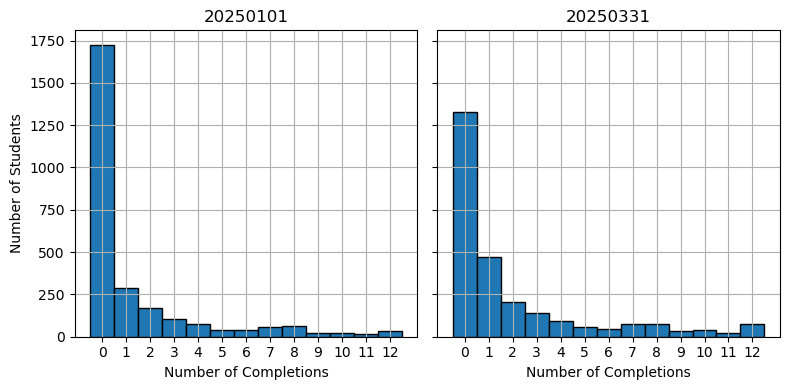

In [103]:
# Set up bins once
bins = [i - 0.5 for i in range(14)]  # bins to center on 0–12

# Prepare data
df1 = gb_data_500_501_20250101_noNull_sum.copy()
df2 = gb_data_500_501_20250331_noNull_sum.copy()

# Create side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)

# Plot for Dataset 500
df1['Completion Count'].hist(bins=bins, edgecolor='black', ax=axes[0])
axes[0].set_xticks(range(13))
axes[0].set_xlabel("Number of Completions")
axes[0].set_ylabel("Number of Students")
axes[0].set_title("20250101")

# Plot for Dataset 501
df2['Completion Count'].hist(bins=bins, edgecolor='black', ax=axes[1])
axes[1].set_xticks(range(13))
axes[1].set_xlabel("Number of Completions")
axes[1].set_title("20250331")

# Tidy layout
plt.tight_layout()
plt.show()

#### 2.1.2 Tutored vs Untutored Populations

##### 2.1.2.1 Prepare Data by Tutoring Status

##### Import Data: Cleaned Post Tutor Form

In [ ]:
# the supplied CSV data file is the raw_data directory
ptf_data_clean = pd.read_csv('../data_wrangling_ouput/PTF_2025Q1_id_clean.csv') 
ptf_data_clean.head()

In [108]:
# Always copy to avoid modifying original data
df1 = gb_data_500_501_20250101_noNull_sum.copy()
df2 = ptf_data_clean.copy()

In [109]:
# Ensure both columns are of the same type (usually string)
df1['Learner Identifier'] = df1['Learner Identifier'].astype(str)
df2['Student Email'] = df2['Student Email'].astype(str)

# Extract matching rows (in df1 where "Learner Identifier" exists in df2["Student Email"])
df1_matched = df1[df1['Learner Identifier'].isin(df2['Student Email'])]

# Extract non-matching rows (in df1 where "Learner Identifier" does NOT exist in df2["Student Email"])
df1_unmatched = df1[~df1['Learner Identifier'].isin(df2['Student Email'])]

In [ ]:
# Save transformed version safely
gb_data_500_501_20250101_noNull_sum_Tutor = df1_matched.copy()
gb_data_500_501_20250101_noNull_sum_Tutor.head()

In [ ]:
# Save transformed version safely
gb_data_500_501_20250101_noNull_sum_noTutor = df1_unmatched.copy()
gb_data_500_501_20250101_noNull_sum_noTutor.head()

In [112]:
# check the size of dataset
gb_data_500_501_20250101_noNull_sum.shape, gb_data_500_501_20250101_noNull_sum_Tutor.shape, gb_data_500_501_20250101_noNull_sum_noTutor.shape

((2663, 15), (137, 15), (2526, 15))

In [113]:
# check the size of dataset
ptf_data_clean.shape

(137, 5)

**Checkpoint**: Double-check that all unique "Student Email" entries from the Post Tutor Form match the "Learner Identifier" in the GradeBook. That is, the number of rows in the Tutored Student Group should match the number of rows in the Post Tutor Form data.

##### 2.1.2.2 Visualize Progress Distributions by Tutoring Status

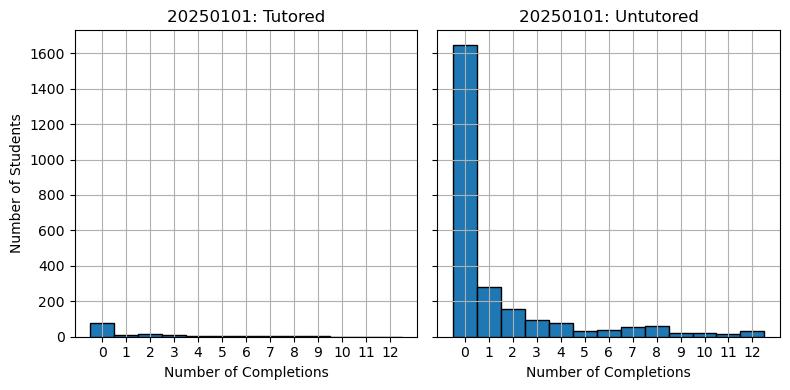

In [116]:
# Set up bins once
bins = [i - 0.5 for i in range(14)]  # bins to center on 0–12

# Prepare data
df1 = gb_data_500_501_20250101_noNull_sum_Tutor.copy()
df2 = gb_data_500_501_20250101_noNull_sum_noTutor.copy()

# Create side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)

# Plot for Dataset1
df1['Completion Count'].hist(bins=bins, edgecolor='black', ax=axes[0])
axes[0].set_xticks(range(13))
axes[0].set_xlabel("Number of Completions")
axes[0].set_ylabel("Number of Students")
axes[0].set_title("20250101: Tutored")

# Plot for Dataset2
df2['Completion Count'].hist(bins=bins, edgecolor='black', ax=axes[1])
axes[1].set_xticks(range(13))
axes[1].set_xlabel("Number of Completions")
axes[1].set_title("20250101: Untutored")

# Tidy layout
plt.tight_layout()
plt.show()

### 2.2 Progress Analysis: Quarterly

#### 2.2.1 Calculate Quarterly Progress: Entire Student Population

In [119]:
# Always copy to avoid modifying original data
df1 = gb_data_500_501_20250101_noNull_sum.copy()
df2 = gb_data_500_501_20250331_noNull_sum.copy()

In [120]:
# Compute the difference between timepoints
completion_progress = df2['Completion Count'] - df1['Completion Count']
percent_progress = df2['% Completion'] - df1['% Completion']

# Construct the result DataFrame
progress_df = pd.DataFrame({
    'Learner Identifier': df1['Learner Identifier'],
    'Completion Count Progress': completion_progress,
    '% Completion Progress': percent_progress
})

In [ ]:
# Save transformed version safely
gb_data_500_501_2025Q1 = progress_df.copy()
gb_data_500_501_2025Q1.head()

In [122]:
#Call the info method on the data to see a summary of the data
gb_data_500_501_2025Q1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2663 entries, 0 to 2662
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Learner Identifier         2663 non-null   object
 1   Completion Count Progress  2663 non-null   int64 
 2   % Completion Progress      2663 non-null   int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 72.8+ KB


#### 2.2.2 Calculate Quarterly Progress: Tutored vs. Untutored Populations

##### 2.2.2.1 Segment Student Population by Tutoring Status

In [125]:
# Always copy to avoid modifying original data
df1 = gb_data_500_501_2025Q1.copy()
df2 = ptf_data_clean.copy()

In [126]:
# Ensure both columns are of the same type (usually string)
df1['Learner Identifier'] = df1['Learner Identifier'].astype(str)
df2['Student Email'] = df2['Student Email'].astype(str)

# Extract matching rows (in df1 where "Learner Identifier" exists in df2["Student Email"])
df1_matched = df1[df1['Learner Identifier'].isin(df2['Student Email'])]

# Extract non-matching rows (in df1 where "Learner Identifier" does NOT exist in df2["Student Email"])
df1_unmatched = df1[~df1['Learner Identifier'].isin(df2['Student Email'])]

In [ ]:
# Save transformed version safely
gb_data_500_501_2025Q1_Tutor = df1_matched.copy()
gb_data_500_501_2025Q1_Tutor.head()

In [ ]:
# Save transformed version safely
gb_data_500_501_2025Q1_noTutor = df1_unmatched.copy()
gb_data_500_501_2025Q1_noTutor.head()

##### 2.2.2.2 Visualize Progress Distributions by Tutoring Status

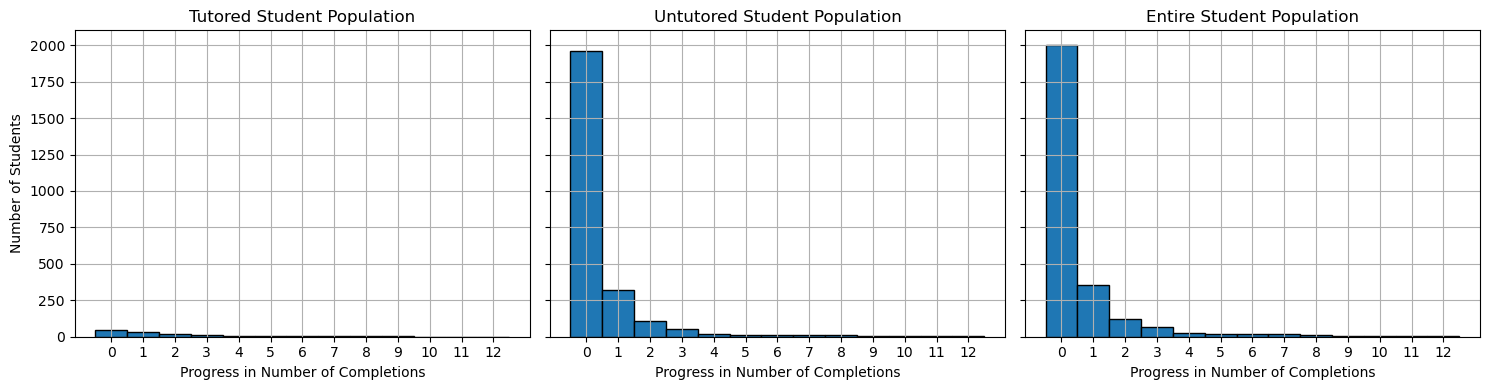

In [130]:
# Set up bins once
bins = [i - 0.5 for i in range(14)]  # bins to center on 0–12

# Prepare data
df1 = gb_data_500_501_2025Q1_Tutor.copy()
df2 = gb_data_500_501_2025Q1_noTutor.copy()
df3 = gb_data_500_501_2025Q1.copy()  # Entire student population

# Create side-by-side plots (3 plots in a row)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)

# Plot for Tutored Students
df1['Completion Count Progress'].hist(bins=bins, edgecolor='black', ax=axes[0])
axes[0].set_xticks(range(13))
axes[0].set_xlabel("Progress in Number of Completions")
axes[0].set_ylabel("Number of Students")
axes[0].set_title("Tutored Student Population") 

# Plot for Untutored Students
df2['Completion Count Progress'].hist(bins=bins, edgecolor='black', ax=axes[1])
axes[1].set_xticks(range(13))
axes[1].set_xlabel("Progress in Number of Completions")
axes[1].set_title("Untutored Student Population")

# Plot for Entire Population
df3['Completion Count Progress'].hist(bins=bins, edgecolor='black', ax=axes[2])
axes[2].set_xticks(range(13))
axes[2].set_xlabel("Progress in Number of Completions")
axes[2].set_title("Entire Student Population") 
# Tidy layout
plt.tight_layout()
plt.show()

##### 2.2.2.3 Remove Graduated Students and Final Visualization

**Note**: Removing `105` graduated students  (those with 0% progress in both the BUS500 and BUS501 courses at baseline), as identified in section **1.3.4 Identify Previously Graduated Students**.

In [133]:
# dataset represents the students who completed the program previously.
zero_both.shape

(105, 19)

**Step 1**: Check if All Students in zero_both  Are Also Present in gb_data_500_501_2025Q1_noTutor.

In [135]:
# To check whether all students in zero_both are also present in gb_data_500_501_2025Q1_noTutor, based on the "Learner Identifier" column
# Check if all Learner Identifiers in zero_both exist in gb_data_500_501_2025Q1_noTutor
all_in_noTutor = zero_both["Learner Identifier"].isin(gb_data_500_501_2025Q1_noTutor["Learner Identifier"])

# Are all students in zero_both also in the noTutor dataset?
all_present_in_noTutor = all_in_noTutor.all()

print("All learners in zero_both are in gb_data_500_501_2025Q1_noTutor:", all_present_in_noTutor)

All learners in zero_both are in gb_data_500_501_2025Q1_noTutor: True


In [136]:
# Show any missing students
missing_learners_noTutor = zero_both[~all_in_noTutor]
print("Learners in zero_both NOT in gb_data_500_501_2025Q1_noTutor:")
print(missing_learners_noTutor)

Learners in zero_both NOT in gb_data_500_501_2025Q1_noTutor:
Empty DataFrame
Columns: [Learner Last Name_500, Learner First Name_500, Learner Identifier, DATA ANALYSIS: Terminology, DATA ANALYSIS: Spreadsheets, DATA ANALYSIS: Basic SQL Queries, DATA ANALYSIS: Presentation Skills, DATA ANALYSIS: Research, DATA ANALYSIS: Data Validity, DATA ANALYSIS: Mathematical Principles, Introduction to Data Analysis Program_500, Learner Last Name_501, Learner First Name_501, DATA ANALYSIS: Intermediate SQL Queries, DATA ANALYSIS: Data Ethics, DATA ANALYSIS: Data Presentation Skills, DATA ANALYSIS: Professional Learning, DATA ANALYSIS: Durable Skills, Introduction to Data Analysis Program_501]
Index: []


**Step 2**: Since the Tutor and noTutor dataset does not overlap, zero_both should not present in gb_data_500_501_2025Q1_Tutor.

In [138]:
# Check if any Learner Identifiers in zero_both exist in gb_data_500_501_2025Q1_Tutor
in_Tutor = zero_both["Learner Identifier"].isin(gb_data_500_501_2025Q1_Tutor["Learner Identifier"])

# Are all students in zero_both NOT in the Tutor dataset?
none_in_Tutor = (~in_Tutor).all()

print("All learners in zero_both are NOT in gb_data_500_501_2025Q1_Tutor:", none_in_Tutor)

All learners in zero_both are NOT in gb_data_500_501_2025Q1_Tutor: True


In [139]:
# Show any learners who ARE in the Tutor dataset (i.e., unexpected)
present_in_Tutor = zero_both[in_Tutor]
print("Learners in zero_both that ARE in gb_data_500_501_2025Q1_Tutor (should not be):")
print(present_in_Tutor)

Learners in zero_both that ARE in gb_data_500_501_2025Q1_Tutor (should not be):
Empty DataFrame
Columns: [Learner Last Name_500, Learner First Name_500, Learner Identifier, DATA ANALYSIS: Terminology, DATA ANALYSIS: Spreadsheets, DATA ANALYSIS: Basic SQL Queries, DATA ANALYSIS: Presentation Skills, DATA ANALYSIS: Research, DATA ANALYSIS: Data Validity, DATA ANALYSIS: Mathematical Principles, Introduction to Data Analysis Program_500, Learner Last Name_501, Learner First Name_501, DATA ANALYSIS: Intermediate SQL Queries, DATA ANALYSIS: Data Ethics, DATA ANALYSIS: Data Presentation Skills, DATA ANALYSIS: Professional Learning, DATA ANALYSIS: Durable Skills, Introduction to Data Analysis Program_501]
Index: []


**Step 3**: Removing students in zero_both from gb_data_500_501_2025Q1 and gb_data_500_501_2025Q1_noTutor

In [141]:
# Remove students in zero_both from gb_data_500_501_2025Q1
gb_data_500_501_2025Q1_noGraduate = gb_data_500_501_2025Q1[~gb_data_500_501_2025Q1["Learner Identifier"].isin(zero_both["Learner Identifier"])]

# Optional: Check how many rows were removed
print(f"Original row count: {gb_data_500_501_2025Q1.shape[0]}")
print(f"Remaining row count after removal: {gb_data_500_501_2025Q1_noGraduate.shape[0]}")
print(f"Number of students removed: {gb_data_500_501_2025Q1.shape[0] - gb_data_500_501_2025Q1_noGraduate.shape[0]}")

Original row count: 2663
Remaining row count after removal: 2558
Number of students removed: 105


In [142]:
# Remove students in zero_both from gb_data_500_501_2025Q1_noTutor
gb_data_500_501_2025Q1_noTutor_noGraduate = gb_data_500_501_2025Q1_noTutor[~gb_data_500_501_2025Q1_noTutor["Learner Identifier"].isin(zero_both["Learner Identifier"])]

# Optional: Report summary
print(f"Original row count (noTutor): {gb_data_500_501_2025Q1_noTutor.shape[0]}")
print(f"Remaining row count after removal: {gb_data_500_501_2025Q1_noTutor_noGraduate.shape[0]}")
print(f"Number of students removed: {gb_data_500_501_2025Q1_noTutor.shape[0] - gb_data_500_501_2025Q1_noTutor_noGraduate.shape[0]}")

Original row count (noTutor): 2526
Remaining row count after removal: 2421
Number of students removed: 105


In [143]:
# check the size of dataset
gb_data_500_501_2025Q1_noGraduate.shape, gb_data_500_501_2025Q1_Tutor.shape, gb_data_500_501_2025Q1_noTutor_noGraduate.shape

((2558, 3), (137, 3), (2421, 3))

**Checkpont**: Entire Population (2558) = Tutor Population (137) + noTutor Population (2421)

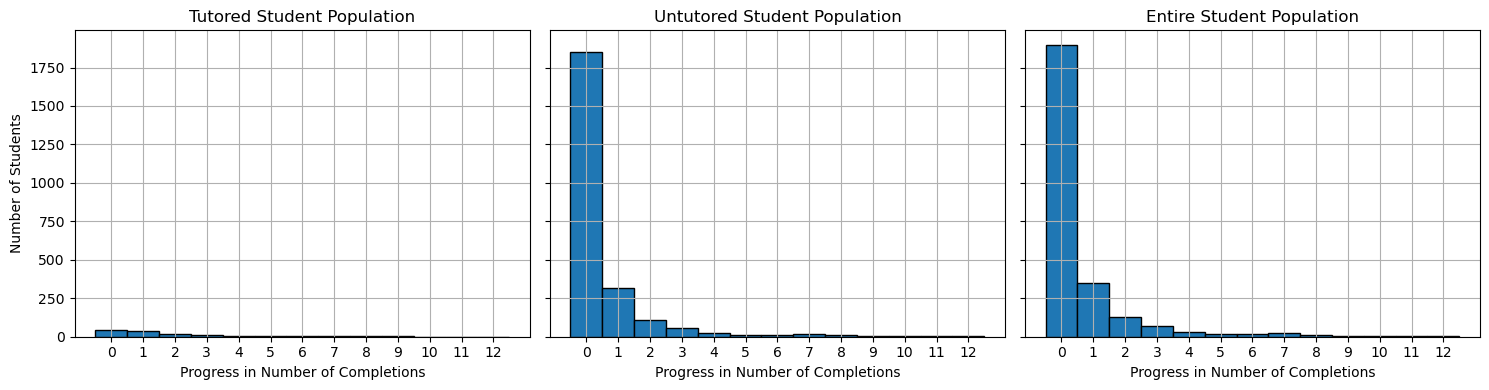

In [145]:
# Set up bins once
bins = [i - 0.5 for i in range(14)]  # bins to center on 0–12

# Prepare data
df1 = gb_data_500_501_2025Q1_Tutor.copy()
df2 = gb_data_500_501_2025Q1_noTutor_noGraduate.copy()
df3 = gb_data_500_501_2025Q1_noGraduate.copy()  # Entire student population

# Create side-by-side plots (3 plots in a row)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)

# Plot for Tutored Students
df1['Completion Count Progress'].hist(bins=bins, edgecolor='black', ax=axes[0])
axes[0].set_xticks(range(13))
axes[0].set_xlabel("Progress in Number of Completions")
axes[0].set_ylabel("Number of Students")
axes[0].set_title("Tutored Student Population") 

# Plot for Untutored Students
df2['Completion Count Progress'].hist(bins=bins, edgecolor='black', ax=axes[1])
axes[1].set_xticks(range(13))
axes[1].set_xlabel("Progress in Number of Completions")
axes[1].set_title("Untutored Student Population") 

# Plot for Entire Population
df3['Completion Count Progress'].hist(bins=bins, edgecolor='black', ax=axes[2])
axes[2].set_xticks(range(13))
axes[2].set_xlabel("Progress in Number of Completions")
axes[2].set_title("Entire Student Population") 

# Tidy layout
plt.tight_layout()
plt.show()

---
## 3 Data Export and Summary

In [147]:
# Save to a specific folder
gb_data_500_501_2025Q1_noGraduate.to_csv("../data_wrangling_ouput/BUS500-501_2025Q1.csv", index=False)
gb_data_500_501_2025Q1_Tutor.to_csv("../data_wrangling_ouput/BUS500-501_2025Q1_Tutor.csv", index=False)
gb_data_500_501_2025Q1_noTutor_noGraduate.to_csv("../data_wrangling_ouput/BUS500-501_2025Q1_noTutor.csv", index=False)
print("All files saved successfully to data_wrangling_output folder")

All files saved successfully to data_wrangling_output folder


### 3.1 Summary
- Total students analyzed: `2,558` (after removing `105` graduated students)
- Tutored students: `137 (5.4%)`
- Untutored students: `2,421 (94.6%)`
- Data exported for statistical modeling in Notebook 2

### 3.2 Summary of Outputs:
- `BUS500-501_2025Q1_v3.csv`: Progress for all currently enrolled students (n=`2,558`)
- `BUS500-501_Tutor_v3.csv`: Progress for tutored students only (n=`137`)
- `BUS500-501_2025Q1_noTutor_v3.csv`: Progress for untutored students only (n=`2,421`)
- All datasets show completion count progress (0-12 scale) and percentage progress for `Q1 2025`.